# Einführung in Python für die Computational Social Science (CSS)

## Jonas Volle
Wissenschaftlicher Mitarbeiter  
Chair of Methodology and Empirical Social Research  
Otto-von-Guericke-Universität

[jonas.volle@ovgu.de](mailto:jonas.volle@ovgu.de)

**Sprechstunde**: individuell nach vorheriger Anmeldung per [Mail](mailto:jonas.volle@ovgu.de)

Samstag, 17.06.2023

**Quelle:** Ich orientiere mich für diese Sitzung in Teilen am Kapitel 7 aus dem Buch:  

McLevey, John. 2021. Doing Computational Social Science: A Practical Introduction. 1st ed. Thousand Oaks: SAGE Publications.

und der Introduction to Computational Social Science methods with Python von GESIS unter: https://github.com/gesiscss/css_methods_python 

# Tag 4: 
- Visualisierung
- explorative Datenanalyse
- Kurzer Exkurs zu Textanalysen

In [14]:
# import os 
import pandas as pd 
import numpy as np 

## Beschreibung und Visualisierung von Verteilungen

In [2]:
fsdf = pd.read_csv('../data/vdem/filtered_subset.csv')

In [3]:
fsdf.shape

(18787, 13)

Für **metrische** Daten können wir Statistiken, wie Median, Mittelwert oder Standardabweichung berechnen.

In [4]:
egal = fsdf['v2x_egaldem']

In [5]:
print(f'Median Egalitarian Democracy Score: {egal.median()}') 
print(f'Mean Egalitarian Democracy Score: {egal.mean()}') 
print(f'Standard Deviation: {egal.std()}')

Median Egalitarian Democracy Score: 0.142
Mean Egalitarian Democracy Score: 0.2368012609796842
Standard Deviation: 0.23019217079493423


Mit `numpy` können wir die Statistiken runden:

In [6]:
print(f'Median Egalitarian Democracy Score: {round(egal.median(),3)}') 
print(f'Mean Egalitarian Democracy Score: {round(egal.mean(), 3)}') 
print(f'Standard Deviation: {round(egal.std(), 3)}')

Median Egalitarian Democracy Score: 0.142
Mean Egalitarian Democracy Score: 0.237
Standard Deviation: 0.23


Für **kategoriale** Daten können wir uns einzigartige (unique) Elemente ansehen:

In [7]:
list(fsdf['country_name'].unique())[0:10]

['Mexico',
 'Suriname',
 'Sweden',
 'Switzerland',
 'Ghana',
 'South Africa',
 'Japan',
 'Burma/Myanmar',
 'Russia',
 'Albania']

und das Auftreten der Kategorien zählen.

In [8]:
fsdf['country_name'].value_counts().head(10)

country_name
Mexico                              120
Dominican Republic                  120
Uruguay                             120
Algeria                             120
Angola                              120
China                               120
Democratic Republic of the Congo    120
Djibouti                            120
Eritrea                             120
Sri Lanka                           120
Name: count, dtype: int64

In [11]:
fsdf['country_name'].value_counts().tail(10)

country_name
Belarus                   30
Kazakhstan                30
Kyrgyzstan                30
Moldova                   30
Ukraine                   30
Turkmenistan              30
North Macedonia           29
Bosnia and Herzegovina    28
Kosovo                    21
South Sudan                9
Name: count, dtype: int64

Aus dieser Statistik können wir auch einen schönen Plot erzeugen. Hierfür verwenden wir das Paket `seaborn`. Die Dokumentation finden wir unter: https://seaborn.pydata.org/index.html

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns 

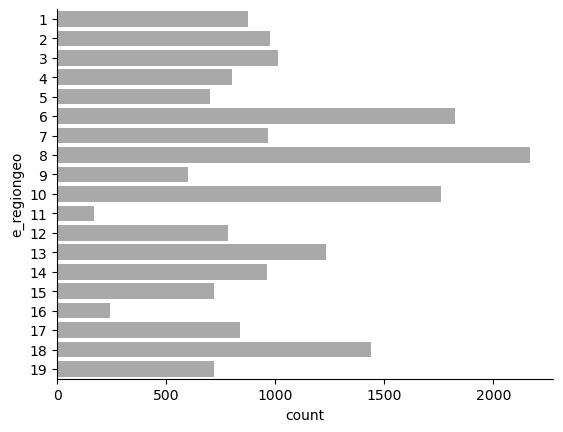

In [16]:
ax = sns.countplot(data=fsdf, y='e_regiongeo', color='darkgray') 
sns.despine()
plt.show()

Wir können die Autoren auf der y-Achse auch sortieren:

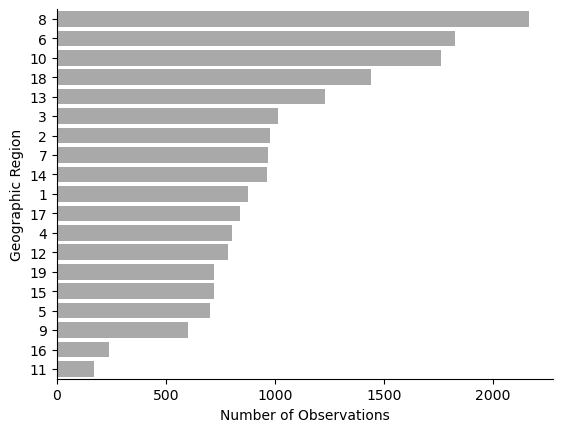

In [17]:
ax = sns.countplot(data=fsdf, 
                   y='e_regiongeo', 
                   color='darkgray', 
                   order = fsdf['e_regiongeo'].value_counts().index) 
sns.despine()
ax.set(xlabel='Number of Observations', 
       ylabel='Geographic Region') 

plt.show()

In [18]:
region_strings = { 1: "Western Europe", 
                  2: "Northern Europe", 
                  3: "Southern Europe", 
                  4: "Eastern Europe", 
                  5: "Northern Africa", 
                  6: "Western Africa", 
                  7: "Middle Africa",
                  8: "Eastern Africa", 
                  9: "Southern Africa", 
                  10: "Western Asia", 
                  11: "Central Asia", 
                  12: "East Asia", 
                  13: "South-East Asia", 
                  14: "South Asia", 
                  15: "Oceania", # (including Australia and the Pacific) 
                  16: "North America", 
                  17: "Central America", 
                  18: "South America", 
                  19: "Caribbean" # (including Belize, Cuba, Haiti, Dominican Republic and Guyana) 
                 }

In [19]:
fsdf.replace({'e_regiongeo': region_strings}, inplace=True)

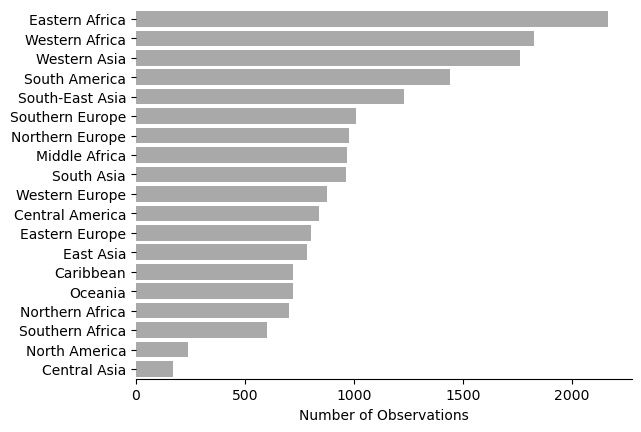

In [20]:
ax = sns.countplot(data=fsdf, 
                   y='e_regiongeo', 
                   color='darkgray', 
                   order = fsdf['e_regiongeo'].value_counts().index) # orders the bars 
sns.despine(left=True) 
ax.set(xlabel='Number of Observations', ylabel='')
plt.show()

In [21]:
fsdf['e_regiongeo'].value_counts()

e_regiongeo
Eastern Africa     2166
Western Africa     1824
Western Asia       1762
South America      1440
South-East Asia    1231
Southern Europe    1011
Northern Europe     975
Middle Africa       966
South Asia          962
Western Europe      876
Central America     837
Eastern Europe      802
East Asia           784
Caribbean           720
Oceania             720
Northern Africa     700
Southern Africa     600
North America       240
Central Asia        171
Name: count, dtype: int64

### Univariate Histogramme

Um uns die Verteilung metrischer Variablen anzusehen, können wir Histogramme verwenden:

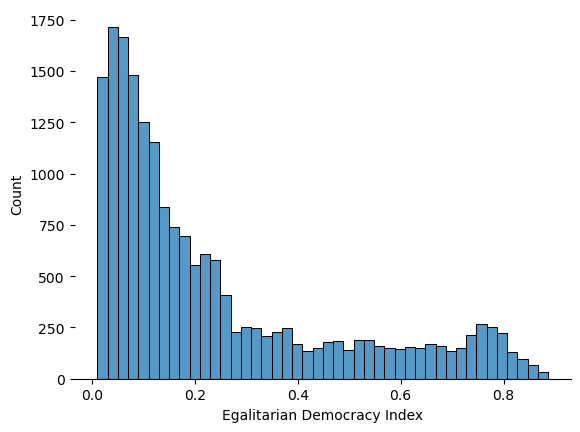

In [22]:
ax = sns.histplot(data=fsdf, x='v2x_egaldem') 
sns.despine(left=True, right=True, top=True) 
ax.set(xlabel='Egalitarian Democracy Index', ylabel='Count')
plt.show()

Wir können dieses Histogramm anpassen wie wir wollen. Wir können z.B. die Anzahl der bins verändern:

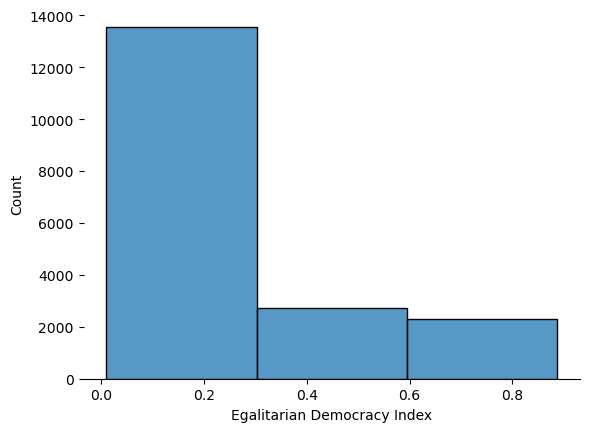

In [23]:
ax = sns.histplot(data=fsdf, x='v2x_egaldem', bins=3) 
sns.despine(left=True, right=True, top=True) 
ax.set(xlabel='Egalitarian Democracy Index', ylabel='Count')
plt.show()

oder die Breite der bins verändern:

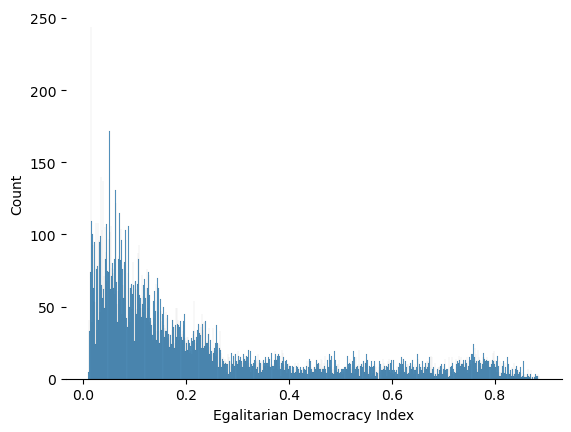

In [24]:
ax = sns.histplot(data=fsdf, x='v2x_egaldem', binwidth = 0.001) 
sns.despine(left=True, right=True, top=True) 
ax.set(xlabel='Egalitarian Democracy Index', ylabel='Count') 
plt.show()

Dem Histogramm können wir z.B. auch eine Dichtefunktion hinzufügen:

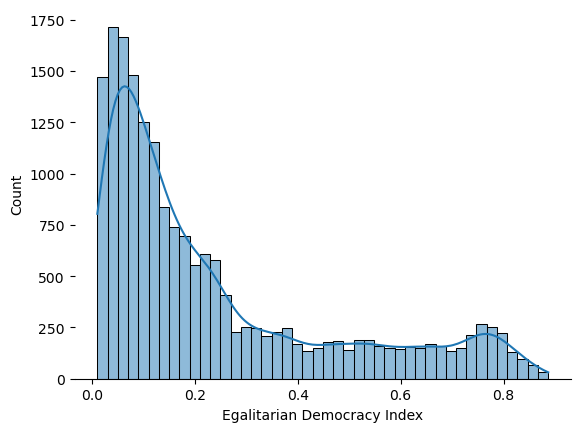

In [25]:
ax = sns.histplot(data=fsdf, x='v2x_egaldem', kde=True) 
sns.despine(left=True, right=True, top=True) 
ax.set(xlabel='Egalitarian Democracy Index', ylabel='Count') 
plt.show()

### Bosplots

Die Verteilung des Egalitarian Democracy Index können wir uns auch mit einem Boxplot ansehen:

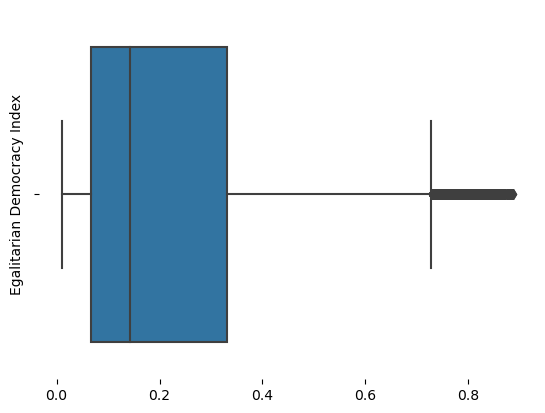

In [26]:
ax = sns.boxplot(data=fsdf, x='v2x_egaldem') 
sns.despine(left=True, right=True, top=True, bottom=True) 
ax.set(xlabel='', ylabel='Egalitarian Democracy Index') 
plt.show()

### Konditionale Histogramme

Wir können mit `.displot()` die Verteilungen einer Variable unter einer Bedingung ansehen. In diesem Fall die Verteilung des Egalitarian Democracy Index unter der Bedingung, dass die jeweiligen Länder Demokratien sind (`e_boix_regime == 1`) oder nicht (`e_boix_regime == 0`).

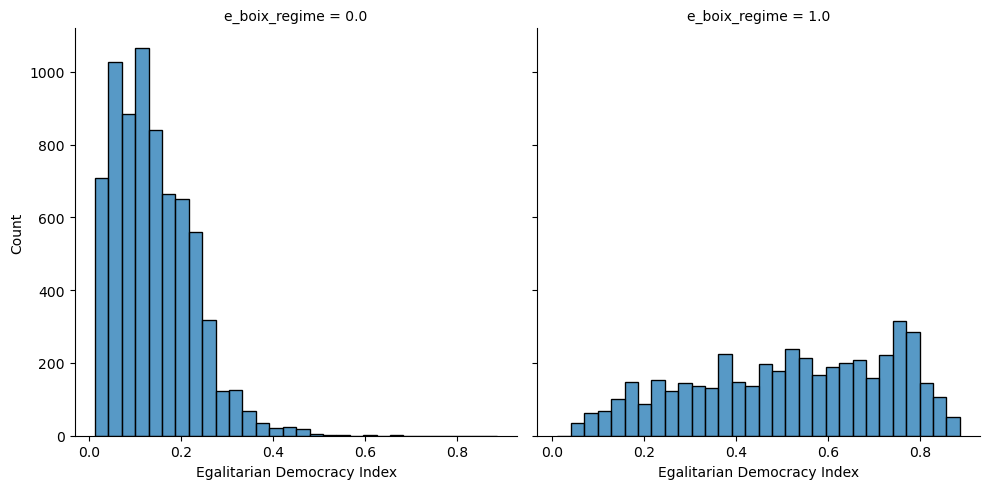

In [27]:
ax = sns.displot(fsdf, 
                 x="v2x_egaldem",
                 col="e_boix_regime"
                ) 
ax.set(xlabel='Egalitarian Democracy Index') 
plt.show()

Wir können diese beiden Hstogramme auch in einem Koordinatensystem ansehen:

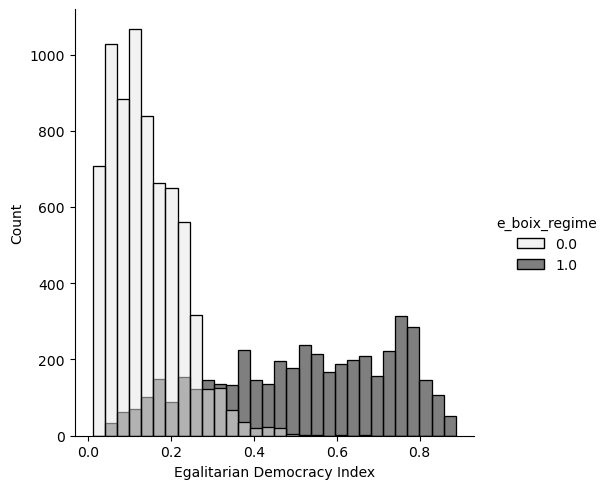

In [28]:
grayscale_cmap = sns.cubehelix_palette(50,
                                       hue=0.05,
                                       rot=0,
                                       light=0.9,
                                       dark=0,
                                       as_cmap =True) 

ax = sns.displot(fsdf, 
                 x="v2x_egaldem", 
                 hue="e_boix_regime", 
                 palette=grayscale_cmap) 

ax.set(xlabel='Egalitarian Democracy Index') 
plt.show()

Auch hier können wir wieder Dichtefunktionen hinzufügen:

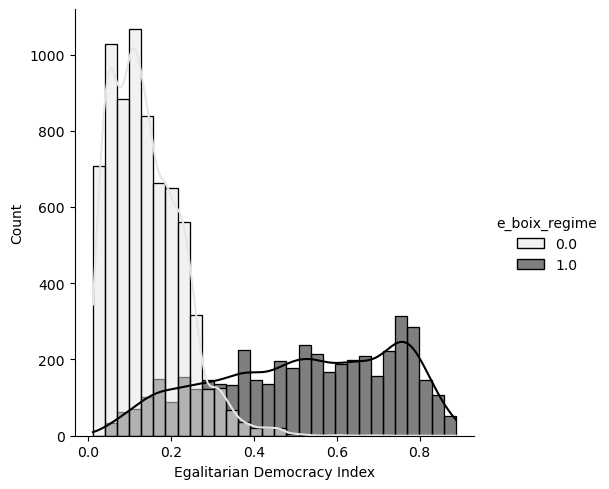

In [29]:
grayscale_cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap =True) 

ax = sns.displot(fsdf, x="v2x_egaldem", 
                 hue="e_boix_regime", 
                 kde = True,
                 palette=grayscale_cmap) 

ax.set(xlabel='Egalitarian Democracy Index') 
plt.show()

Diese zwei bedingten Verteilungen, können wir uns auch mit Boxplots ansehen:

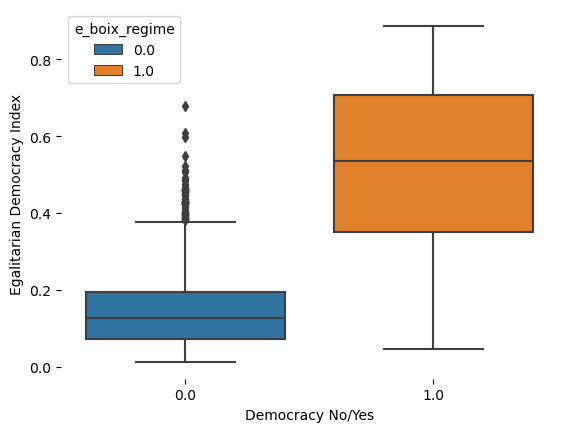

In [30]:
ax = sns.boxplot(data=fsdf,
                 x='e_boix_regime',
                 y='v2x_egaldem',
                 hue="e_boix_regime",
                 dodge=False
                ) 
sns.despine(left=True, right=True, top=True, bottom=True) 
ax.set(xlabel='Democracy No/Yes', ylabel='Egalitarian Democracy Index') 
plt.show()

### Visualisierung gemeinsamer Verteilungen

#### Kreuztabellen

Die gemeinsame Verteilung zweier kategorialer Variablen können wir mit einer Kreuztabelle untersuchen:

In [31]:
ct = pd.crosstab(fsdf.e_regiongeo, fsdf.e_boix_regime)

In [32]:
ct

e_boix_regime,0.0,1.0
e_regiongeo,,
Caribbean,266,208
Central America,520,254
Central Asia,100,0
East Asia,389,119
Eastern Africa,677,123
Eastern Europe,493,210
Middle Africa,386,33
North America,0,222
Northern Africa,367,9


### Scatterplots

Um den zusammenhang zweier metrischer Variablen zu beobachten, können wir Scatterplots verwenden:

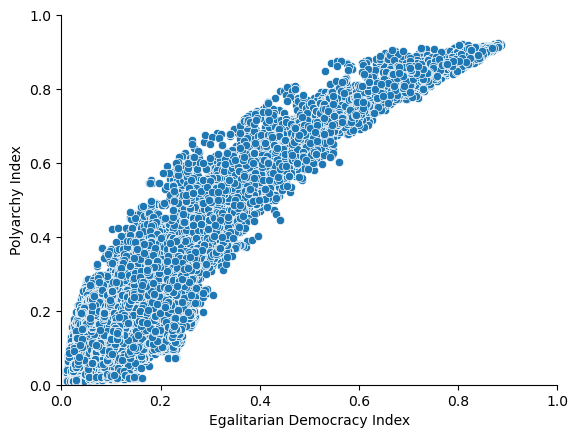

In [33]:
ax = sns.scatterplot(data = fsdf,
                     x="v2x_egaldem",
                     y="v2x_polyarchy") 
sns.despine() 
ax.set(xlabel='Egalitarian Democracy Index', ylabel='Polyarchy Index') 
plt.xlim(0, 1) 
plt.ylim(0, 1)
plt.show()

In diesem Plot überlappen sich die Punkte sehr. Wir können die Transparenz der Punkte mit `alpha` etwas heruntersetzen und so die Ansammlungen von Datenpunkten besser sehen:

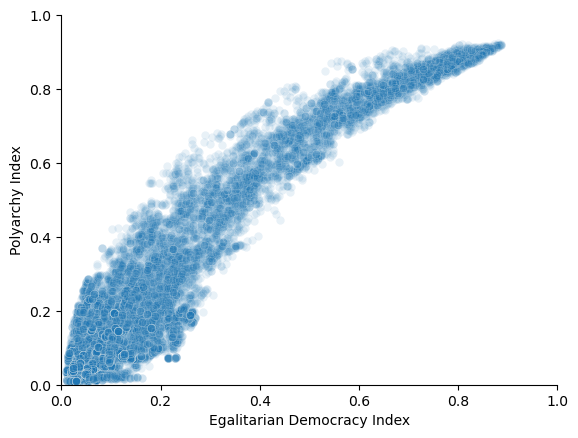

In [34]:
ax = sns.scatterplot(data = fsdf, 
                     x="v2x_egaldem",
                     y="v2x_polyarchy", 
                     alpha = 0.1) 
sns.despine() 
ax.set(xlabel='Egalitarian Democracy Index', ylabel='Polyarchy Index') 
plt.xlim(0, 1) 
plt.ylim(0, 1)
plt.show()

### Line of best fit

Unter Annahme eines linearen Zusammenhangs, können wir eine Regressionsline/Korrelationslinie in die Daten plotten, die den Abstand zwischen sich selbst und jeder Beobachtung minimiert.

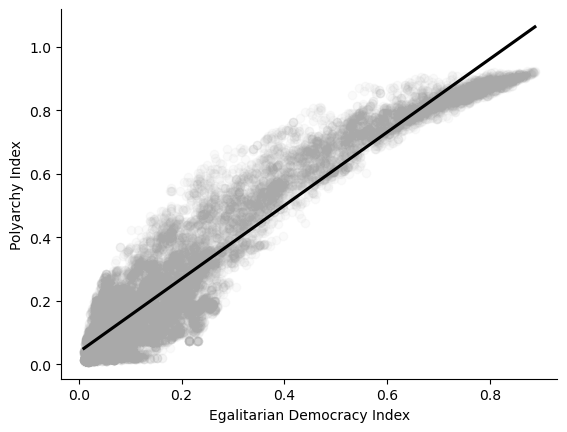

In [35]:
ax = sns.regplot(data = fsdf, x = "v2x_egaldem",
                 y = "v2x_polyarchy", 
                 color='darkgray',
                 scatter_kws = {"alpha": 0.05}, 
                 line_kws={"color": "black"}) 
sns.despine() 
ax.set(xlabel='Egalitarian Democracy Index', ylabel='Polyarchy Index') 
plt.show()

### Korrelation

Die Korrelation können wir ganz einfach mit der `.corr()` Funktion berechnen:

Die Korrelation ist ein Maß für die lineare Beziehung bzw. Abhängigkeit zwischen zwei Variablen. Wenn zwei Variablen eine starke lineare Beziehung aufweisen - mit anderen Worten, wenn ein hohes Maß an Abhängigkeit zwischen ihnen besteht -, dann können wir die Werte der einen Variablen verwenden, um die Werte der anderen vorherzusagen. Die Korrelation beschreibt die standardisierte Richtung einer linearen Beziehung zwischen Variablen sowie die Stärke dieser Beziehung. Die Korrelationskoeffizienten liegen zwischen -1 und +1, wobei ein Koeffizient von 1 für eine vollkommen lineare abhängige Beziehung zwischen zwei beliebigen Variablen steht. Ein Koeffizient von -1 steht ebenfalls für eine perfekt lineare abhängige Beziehung, allerdings in der entgegengesetzten Richtung.

In [36]:
corr_libdem_partipdem = fsdf.v2x_libdem.corr(fsdf.v2x_partipdem) 
corr_libdem_year = fsdf.v2x_libdem.corr(fsdf.year) 
print(f'Correlation of v2x_libdem and v2x_partipdem: {corr_libdem_partipdem}')
print(f'Correlation of v2x_libdem and year: {corr_libdem_year}')

Correlation of v2x_libdem and v2x_partipdem: 0.9699497043536188
Correlation of v2x_libdem and year: 0.38279668975538333


Wenn wir mehrere metrische Variablen haben, deren Zusammenhang wir prüfen möchten, können wir eine Korrelationsmatrix erstellen, die die Korrelationswerte aller möglichen Kombinationen der variablen enthält:

In [37]:
fsdf_corr = fsdf[['v2x_polyarchy',
                  'v2x_libdem',
                  'v2x_partipdem', 
                  'v2x_delibdem', 
                  'v2x_egaldem']].corr()

In [38]:
fsdf_corr

,v2x_polyarchy,v2x_libdem,v2x_partipdem,v2x_delibdem,v2x_egaldem
v2x_polyarchy,1.000000,0.971749,0.971575,0.971000,0.952524
v2x_libdem,0.971749,1.000000,0.969950,0.977664,0.964447
v2x_partipdem,0.971575,0.969950,1.000000,0.968540,0.951143
v2x_delibdem,0.971000,0.977664,0.968540,1.000000,0.961308
v2x_egaldem,0.952524,0.964447,0.951143,0.961308,1.000000


Diese Matrix können wir mit einer Heatmap darstellen:

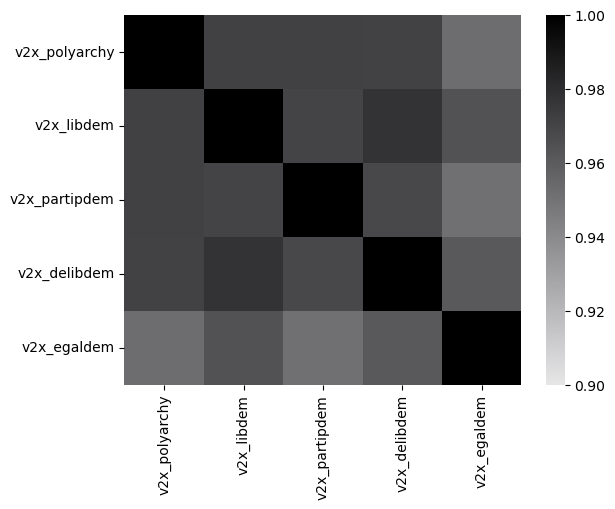

In [39]:
ax = sns.heatmap(data = fsdf_corr, 
                 vmin = 0.9, 
                 vmax = 1, 
                 cmap=grayscale_cmap) 
plt.show()

Diese Heatmap spiegelt sich entlang der Diagonalen. Eine doppelte Hälfte können wir auch ausblenden, indem wir eine Maske erzeugen.

In [40]:
mask = np.triu(np.ones_like(fsdf_corr, dtype = bool)) 

In [41]:
mask

array([[ True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True],
       [False, False,  True,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False, False,  True]])

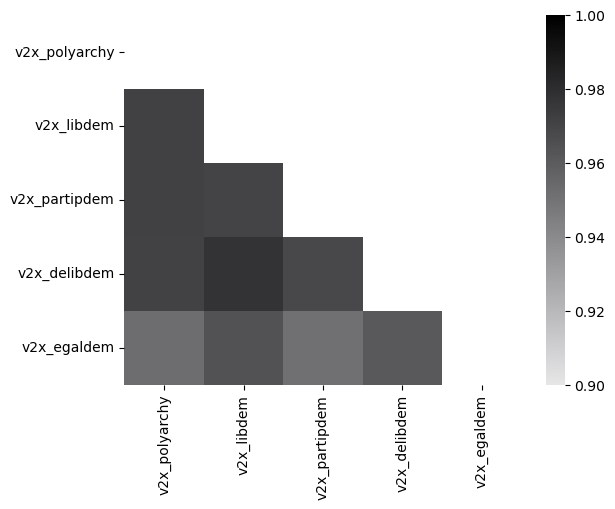

In [42]:
ax = sns.heatmap(fsdf_corr, 
                 mask = mask, 
                 vmin = 0.9, 
                 vmax = 1, 
                 cmap=grayscale_cmap) 
plt.show()

### Schnelle Vergleiche mit Paarplots

Wenn wir eine Reihe an metrischen Variablen haben, die wir schnell miteinander vergleichen wollen. Können wir das mit `sns.pairplot()` tun.

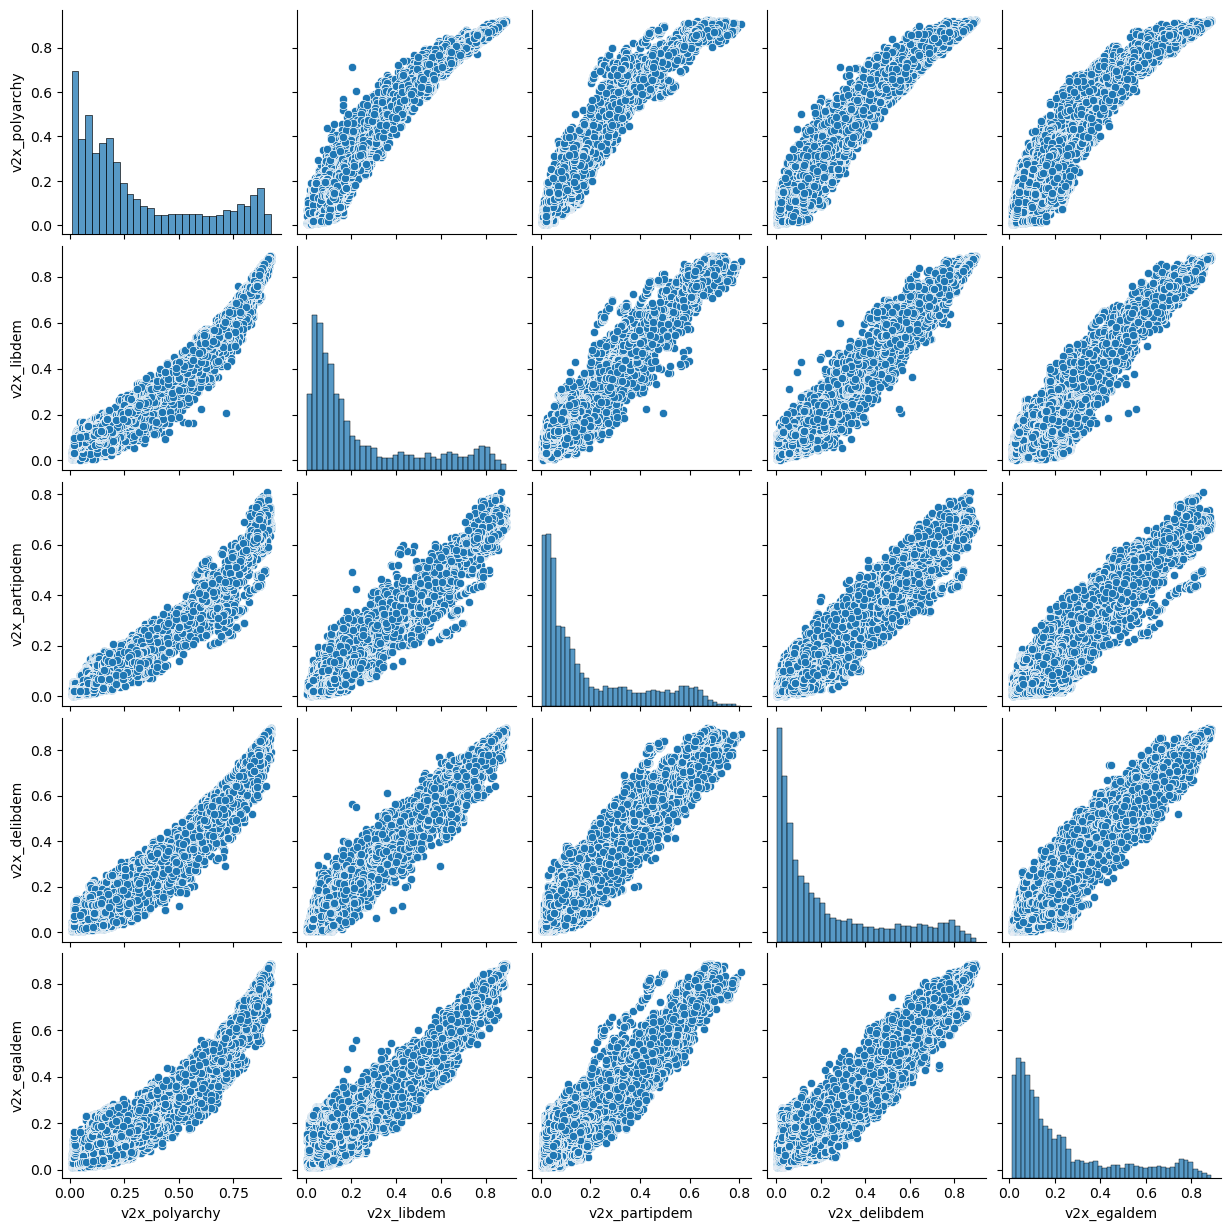

In [43]:
high_level_indexes = ['v2x_polyarchy', 
                      'v2x_libdem', 
                      'v2x_partipdem', 
                      'v2x_delibdem', 
                      'v2x_egaldem'] 

ax = sns.pairplot(fsdf[high_level_indexes]) 
plt.show()

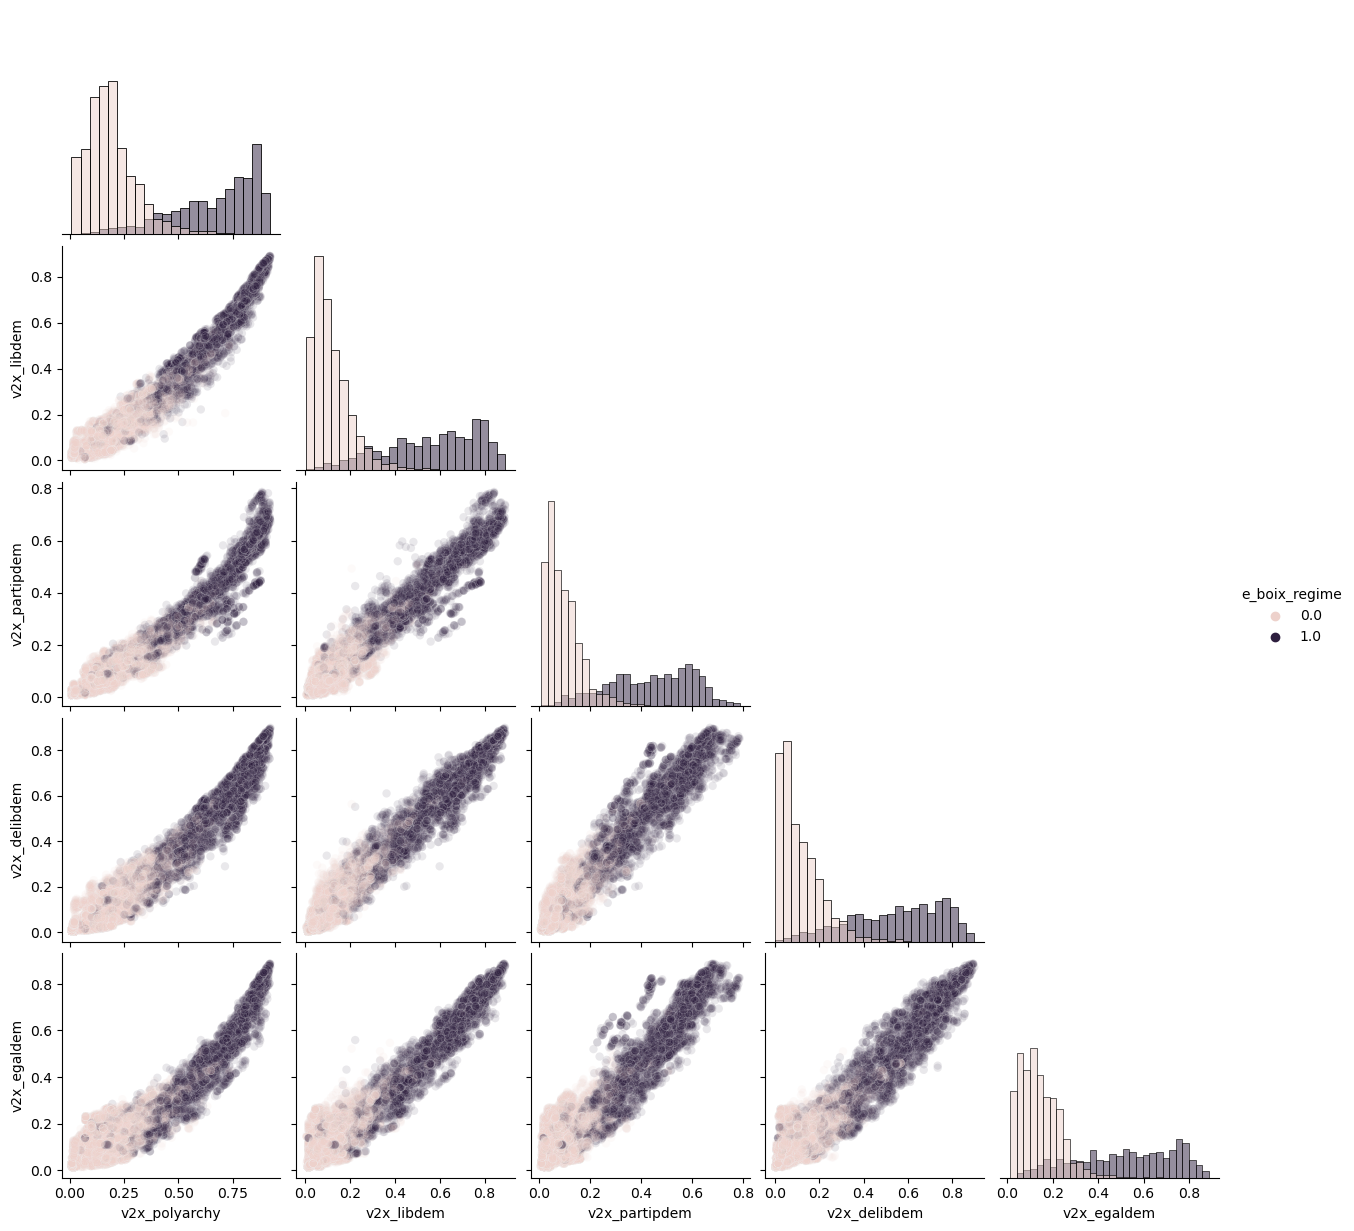

In [45]:
high_level_indexes = ['v2x_polyarchy', 
                      'v2x_libdem', 
                      'v2x_partipdem', 
                      'v2x_delibdem', 
                      'v2x_egaldem',
                     'e_boix_regime'] 

ax = sns.pairplot(fsdf[high_level_indexes], 
                  hue='e_boix_regime',
                  diag_kind='hist',
                  corner=True,
                  plot_kws={'alpha': 0.1}
                 ) 
plt.show()

**Zeit für Übung 1**

## Textanalysen

Nun ein kurzer Ausblick in die Textanalyse mit Python. Wir benutzen exemplarisch die Artikel, die wir von der cyclingnews Webseite gescraped haben.

In [181]:
cn_df = pd.read_csv('../data/cycling_news_articles.csv')

In [182]:
cn_df.shape

(180, 5)

In [183]:
cn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   url     180 non-null    object
 1   title   180 non-null    object
 2   date    180 non-null    object
 3   author  180 non-null    object
 4   text    180 non-null    object
dtypes: object(5)
memory usage: 7.2+ KB


In [184]:
cn_df.head()

,url,title,date,author,text
0,https://www.cyclingnews.com/news/elisa-longo-b...,Elisa Longo Borghini abandons Giro Donne d'Ita...,2023-07-05T08:05:47Z,Simone Giuliani,Elisa Longo Borghini will not start stage 6 of...
1,https://www.cyclingnews.com/news/how-to-watch-...,"How to watch stages 5, 6 and 7 of the Tour de ...",2023-07-04T20:51:11Z,Laura Weislo,"Tour de France stage 5, 6 and 7 dates: July 5,..."
2,https://www.cyclingnews.com/news/i-just-needed...,'I just needed to go for it' - Niedermaier tak...,2023-07-04T19:15:28Z,Kirsten Frattini,The day could not have gone any better for Ant...
3,https://www.cyclingnews.com/news/late-gamble-d...,Late gamble doesn't pay as Mark Cavendish miss...,2023-07-04T18:35:28Z,Josh Croxton,Going one better than his 6th place finish on ...
4,https://www.cyclingnews.com/news/caleb-ewan-cl...,Caleb Ewan close to Tour de France stage win d...,2023-07-04T18:22:29Z,Daniel Ostanek,Caleb Ewan's lead-out train might have been de...


Als nächstes müssen wir das Paket `spacy` installieren und ein Sprachmodel herunterladen.

In [7]:
#!conda install spacy

^C


In [ ]:
#!python -m spacy download en_core_web_sm

In [185]:
# import von spacy
import spacy

In [186]:
# Laden des kleinen englischen Sprachmodels
nlp = spacy.load("en_core_web_sm")

### Tokenization

Die durch Leerzeichen und Interpunktion getrennten Wörter eines Textdokuments werden als Token bezeichnet.

In [12]:
text = cn_df.text[0]

In [13]:
doc = nlp(text)

In [229]:
doc[0]

Egan

In [223]:
dir(doc[0])

['_',
 '__bytes__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 'ancestors',
 'check_flag',
 'children',
 'cluster',
 'conjuncts',
 'dep',
 'dep_',
 'doc',
 'ent_id',
 'ent_id_',
 'ent_iob',
 'ent_iob_',
 'ent_kb_id',
 'ent_kb_id_',
 'ent_type',
 'ent_type_',
 'get_extension',
 'has_dep',
 'has_extension',
 'has_head',
 'has_morph',
 'has_vector',
 'head',
 'i',
 'idx',
 'iob_strings',
 'is_alpha',
 'is_ancestor',
 'is_ascii',
 'is_bracket',
 'is_currency',
 'is_digit',
 'is_left_punct',
 'is_lower',
 'is_oov',
 'is_punct',
 'is_quote',
 'is_right_punct',
 'is_sent_end',
 'is_sent_start',
 'is_space',
 'is_stop',
 'is_title',
 'is_upper',
 'lang',
 'lang_',
 'le

In [230]:
for token in doc:
    print('\t', token.text)

	 Egan
	 Bernal
	 has
	 been
	 fined
	 500
	 Swiss
	 Francs
	 and
	 docked
	 25
	 UCI
	 points
	 after
	 he
	 was
	 deemed
	 to
	 have
	 littered
	 outside
	 of
	 the
	 designated
	 refuse
	 collection
	 zones
	 on
	 stage
	 3
	 of
	 the
	 Tour
	 de
	 France
	 .
	 The
	 Ineos
	 rider
	 now
	 risks
	 being
	 docked
	 a
	 minute
	 in
	 the
	 overall
	 standings
	 in
	 the
	 event
	 of
	 a
	 second
	 offence
	 ,
	 while
	 a
	 third
	 littering
	 infraction
	 would
	 see
	 Bernal
	 expelled
	 from
	 the
	 Tour
	 altogether
	 .
	 Bernal
	 was
	 one
	 of
	 three
	 riders
	 sanctioned
	 by
	 the
	 commissaires
	 on
	 stage
	 3
	 to
	 Bayonne
	 ,
	 with
	 Ramon
	 Sinkeldam
	 (
	 Alpecin
	 -
	 Deceuninck
	 )
	 and
	 Chris
	 Harper
	 (
	 Jayco
	 -
	 Alula
	 )
	 also
	 fined
	 and
	 docked
	 UCI
	 points
	 for
	 the
	 same
	 offence
	 .
	 Tour
	 de
	 France
	 :
	 Jasper
	 Philipsen
	 wins
	 stage
	 3
	 after
	 impressive
	 lead
	 -
	 out
	 from
	 Mathieu
	 van
	 der
	 PoelEgan
	 Bernal
	 :
	 It
	

In [232]:
print('Total tokens:', len(doc))

Total tokens: 374


In [233]:
from collections import Counter

# Process all tweets with spaCy and extract all tokens
tokens = []
for text in cn_df.text:
    doc = nlp(text)
    for token in doc:
        tokens.append(token.text)

# Count the occurrences of each token and create a vocabulary of unique tokens
vocabulary = Counter(tokens)

# Print the extracted vocabulary
print("Size of extracted vocabulary: {0}".format(len(vocabulary)))

Size of extracted vocabulary: 9752


In [234]:
vocabulary.most_common(10)

[('the', 6957),
 (',', 5353),
 ('.', 4739),
 ('to', 3089),
 ('and', 2797),
 ('a', 2420),
 ('in', 2267),
 ('of', 2243),
 ('-', 1766),
 ('I', 1374)]

### Lemmatization

Ein Lemma ist die Grundform eines Wortes.  

go, goes, went, gone oder going --> go

In [235]:
text = cn_df.text[10]

# Process the text with spaCy and perform lemmatization
doc = nlp(text)

In [240]:
doc[1].text, doc[1].lemma_

('biggest', 'big')

In [236]:
# Print words and extractes lemmas
for token in doc:
    print("{0} -> {1}".format(token.text, token.lemma_))

The -> the
biggest -> big
race -> race
of -> of
the -> the
season -> season
, -> ,
the -> the
Tour -> Tour
de -> de
France -> France
, -> ,
is -> be
around -> around
the -> the
corner -> corner
, -> ,
kicked -> kick
off -> off
in -> in
the -> the
Basque -> basque
city -> city
of -> of
Bilbao -> Bilbao
on -> on
Saturday -> Saturday
, -> ,
July -> July
1 -> 1
with -> with
Adam -> Adam
Yates -> Yates
taking -> take
the -> the
first -> first
stage -> stage
victory -> victory
and -> and
the -> the
first -> first
yellow -> yellow
jersey -> jersey
of -> of
the -> the
race -> race
. -> .
After -> after
four -> four
stages -> stage
, -> ,
Yates -> Yates
is -> be
still -> still
wearing -> wear
the -> the
maillot -> maillot
jaune -> jaune
, -> ,
leading -> lead
by -> by
six -> six
seconds -> second
ahead -> ahead
of -> of
teammate -> teammate
Tadej -> Tadej
Pogačar -> Pogačar
and -> and
his -> his
own -> own
brother -> brother
, -> ,
Simon -> Simon
Yates -> Yates
( -> (
Jayco -> Jayco
- -> -
AlUl

In [36]:
print('Original text:\n\n', text)

Original text:

 The biggest race of the season, the Tour de France, is around the corner, kicked off in the Basque city of Bilbao on Saturday, July 1 with Adam Yates taking the first stage victory and the first yellow jersey of the race. After four stages, Yates is still wearing the maillot jaune, leading by six seconds ahead of teammate Tadej Pogačar and his own brother, Simon Yates (Jayco-AlUla). The unusually tough first two stages left only 21 riders within one minute of Yates in the current overall standings of the 2023 Tour de France. There is plenty of action still before finale in Paris on Sunday, July 23 and in the next two days there are more mountains as the race route enters the Pyrenees. Stage 5 brings riders over the above category Col du Soudet and category 1 Col de Marie Blanque, where there will be bonus seconds available on the summit for the first three riders across. Stage 6 includes four classified climbs including the Col d'Aspin and Col du Tourmalet and a summit

In [37]:
lemmatized_text = " ".join([token.lemma_ for token in doc])
print('Lemmatized text:', lemmatized_text)

Lemmatized text: the big race of the season , the Tour de France , be around the corner , kick off in the basque city of Bilbao on Saturday , July 1 with Adam Yates take the first stage victory and the first yellow jersey of the race . after four stage , Yates be still wear the maillot jaune , lead by six second ahead of teammate Tadej Pogačar and his own brother , Simon Yates ( Jayco - AlUla ) . the unusually tough first two stage leave only 21 rider within one minute of Yates in the current overall standing of the 2023 Tour de France . there be plenty of action still before finale in Paris on Sunday , July 23 and in the next two day there be more mountain as the race route enter the Pyrenees . stage 5 bring rider over the above category Col du Soudet and category 1 Col de Marie Blanque , where there will be bonus second available on the summit for the first three rider across . stage 6 include four classified climb include the Col d'Aspin and Col du Tourmalet and a summit finish at C

### Stemming

Beim Stemming werden die Suffixe von Wörtern entfernt, um eine vereinfachte Form des Wortes zu erhalten.

running, runner, run -> run

Ein weit verbreiteter Stemming Algorithmus ist der von Porter.

In [ ]:
# !conda install nltk

In [ ]:
# !python -m nltk.downloader popular

In [38]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [39]:
text = cn_df.text[10]

tokens = word_tokenize(text)

tokens

['The',
 'biggest',
 'race',
 'of',
 'the',
 'season',
 ',',
 'the',
 'Tour',
 'de',
 'France',
 ',',
 'is',
 'around',
 'the',
 'corner',
 ',',
 'kicked',
 'off',
 'in',
 'the',
 'Basque',
 'city',
 'of',
 'Bilbao',
 'on',
 'Saturday',
 ',',
 'July',
 '1',
 'with',
 'Adam',
 'Yates',
 'taking',
 'the',
 'first',
 'stage',
 'victory',
 'and',
 'the',
 'first',
 'yellow',
 'jersey',
 'of',
 'the',
 'race',
 '.',
 'After',
 'four',
 'stages',
 ',',
 'Yates',
 'is',
 'still',
 'wearing',
 'the',
 'maillot',
 'jaune',
 ',',
 'leading',
 'by',
 'six',
 'seconds',
 'ahead',
 'of',
 'teammate',
 'Tadej',
 'Pogačar',
 'and',
 'his',
 'own',
 'brother',
 ',',
 'Simon',
 'Yates',
 '(',
 'Jayco-AlUla',
 ')',
 '.',
 'The',
 'unusually',
 'tough',
 'first',
 'two',
 'stages',
 'left',
 'only',
 '21',
 'riders',
 'within',
 'one',
 'minute',
 'of',
 'Yates',
 'in',
 'the',
 'current',
 'overall',
 'standings',
 'of',
 'the',
 '2023',
 'Tour',
 'de',
 'France',
 '.',
 'There',
 'is',
 'plenty',
 'of'

In [40]:
stemmer = PorterStemmer()

stemmed_tokens = [stemmer.stem(token) for token in tokens]

In [43]:
# Let's see results 
for token, stem in zip(tokens, stemmed_tokens):
    print("{0} -> {1}".format(token, stem))

The -> the
biggest -> biggest
race -> race
of -> of
the -> the
season -> season
, -> ,
the -> the
Tour -> tour
de -> de
France -> franc
, -> ,
is -> is
around -> around
the -> the
corner -> corner
, -> ,
kicked -> kick
off -> off
in -> in
the -> the
Basque -> basqu
city -> citi
of -> of
Bilbao -> bilbao
on -> on
Saturday -> saturday
, -> ,
July -> juli
1 -> 1
with -> with
Adam -> adam
Yates -> yate
taking -> take
the -> the
first -> first
stage -> stage
victory -> victori
and -> and
the -> the
first -> first
yellow -> yellow
jersey -> jersey
of -> of
the -> the
race -> race
. -> .
After -> after
four -> four
stages -> stage
, -> ,
Yates -> yate
is -> is
still -> still
wearing -> wear
the -> the
maillot -> maillot
jaune -> jaun
, -> ,
leading -> lead
by -> by
six -> six
seconds -> second
ahead -> ahead
of -> of
teammate -> teammat
Tadej -> tadej
Pogačar -> pogačar
and -> and
his -> hi
own -> own
brother -> brother
, -> ,
Simon -> simon
Yates -> yate
( -> (
Jayco-AlUla -> jayco-alula
) -

In [46]:
# Finally we can recover the text of the tweet after lemmatization
print('Original text:', text)

Original text: The biggest race of the season, the Tour de France, is around the corner, kicked off in the Basque city of Bilbao on Saturday, July 1 with Adam Yates taking the first stage victory and the first yellow jersey of the race. After four stages, Yates is still wearing the maillot jaune, leading by six seconds ahead of teammate Tadej Pogačar and his own brother, Simon Yates (Jayco-AlUla). The unusually tough first two stages left only 21 riders within one minute of Yates in the current overall standings of the 2023 Tour de France. There is plenty of action still before finale in Paris on Sunday, July 23 and in the next two days there are more mountains as the race route enters the Pyrenees. Stage 5 brings riders over the above category Col du Soudet and category 1 Col de Marie Blanque, where there will be bonus seconds available on the summit for the first three riders across. Stage 6 includes four classified climbs including the Col d'Aspin and Col du Tourmalet and a summit f

In [49]:
stemmed_text = " ".join(stemmed_tokens)
print('Stemmed text:', stemmed_text[:1000])

Stemmed text: the biggest race of the season , the tour de franc , is around the corner , kick off in the basqu citi of bilbao on saturday , juli 1 with adam yate take the first stage victori and the first yellow jersey of the race . after four stage , yate is still wear the maillot jaun , lead by six second ahead of teammat tadej pogačar and hi own brother , simon yate ( jayco-alula ) . the unusu tough first two stage left onli 21 rider within one minut of yate in the current overal stand of the 2023 tour de franc . there is plenti of action still befor final in pari on sunday , juli 23 and in the next two day there are more mountain as the race rout enter the pyrene . stage 5 bring rider over the abov categori col du soudet and categori 1 col de mari blanqu , where there will be bonu second avail on the summit for the first three rider across . stage 6 includ four classifi climb includ the col d'aspin and col du tourmalet and a summit finish at cauterets-cambasqu . expect anoth fasci

### N-grams

N-grams sind Kombinationen von n Wörtern. gensim kann Worte erkennen, die oft zusammen auftauchen.

In [241]:
import gensim

# gensim expect as input tokenized texts
texts = []
for text in cn_df.text:
    texts.append(word_tokenize(text))

In [242]:
# extract bigrams
bigrams = gensim.models.Phrases(texts, min_count=5, threshold=100)
texts_bigrams = [bigrams[text] for text in texts]

In [243]:
# visualize the extracted bigrams
extracted_bigrams = []
for text in texts_bigrams:
    for el in text:
        if "_" in el:
            extracted_bigrams.append(el)

extracted_bigrams = set(extracted_bigrams)
print(extracted_bigrams)

{'US_Pro', 'Astana_Qazaqstan', 'record-breaking_35th', 'once_again', 'van_Aert', 'Victor_Lafay', 'home_country', 'Tadej_Pogačar', '100_%', 'directeur_sportif', 'Elisa_Longo', 'Team_Jayco', '795_Blade', 'Critérium_du', 'Antonia_Niedermaier', 'Cycling_League', 'Road_Championships', 'Strade_Bianche', 'Bahrain_Victorious', '–_Analysing', 'Mads_Pedersen', "ca_n't", 'Giro_d', 'NCL_Cup', 'Fire_TV', 'Suisse_Women', 'maglia_rosa', 'July_9', 'looking_forward', 'Tom_Pidcock', 'told_reporters', 'UAE_Team', 'San_Juan', 'Chris_Froome', 'twin_brother', 'maillot_jaune', 'San_Sébastián', ':_Unchained', 'Egan_Bernal', 'Gino_Mäder', 'Remco_Evenepoel', 'ice_bath', 'del_Lupo', 'Arnaud_Démare', 'sports_director', 'carbon_fibre', 'Longo_Borghini', 'Basque_Country', 'Swiss_rider', 'Lorena_Wiebes', 'Magnus_Cort', 'per_month', 'press_release', 'Richard_Carapaz', 'training_camp', 'yellow_jersey', 'bottom_bracket', 'Stefan_Küng', 'SD_Worx', 'climate_change', 'rather_than', 'Peter_Sagan', 'general_classification',

### Stopwords

Stoppwörter sind Wörter, die häufig in einer Sprache verwendet werden, aber normalerweise keine große Bedeutung oder keinen semantischen Wert haben, wenn sie im Kontext verwendet werden. Beispiele für Stoppwörter im Englischen sind "the", "a", "an", "and", "in", "on", "is", "are", "for", "with" und so weiter.

In [50]:
from spacy.lang.en.stop_words import STOP_WORDS

In [73]:
text = cn_df.text[12]

# Process the text with spaCy
doc = nlp(text)

# Define the list of stop words
stop_words = list(STOP_WORDS)

In [74]:
# Remove stop words from the text
filtered_text = [token.text for token in doc if token.text.lower() not in stop_words]
stop_words_removed = [token.text for token in doc if token.text.lower() in stop_words]

In [75]:
# Print the original and filtered text, and the stop words removed
print("Original tokens: ", [token.text for token in doc])

Original tokens:  ['Egan', 'Bernal', 'has', 'been', 'fined', '500', 'Swiss', 'Francs', 'and', 'docked', '25', 'UCI', 'points', 'after', 'he', 'was', 'deemed', 'to', 'have', 'littered', 'outside', 'of', 'the', 'designated', 'refuse', 'collection', 'zones', 'on', 'stage', '3', 'of', 'the', 'Tour', 'de', 'France', '.', 'The', 'Ineos', 'rider', 'now', 'risks', 'being', 'docked', 'a', 'minute', 'in', 'the', 'overall', 'standings', 'in', 'the', 'event', 'of', 'a', 'second', 'offence', ',', 'while', 'a', 'third', 'littering', 'infraction', 'would', 'see', 'Bernal', 'expelled', 'from', 'the', 'Tour', 'altogether', '.', 'Bernal', 'was', 'one', 'of', 'three', 'riders', 'sanctioned', 'by', 'the', 'commissaires', 'on', 'stage', '3', 'to', 'Bayonne', ',', 'with', 'Ramon', 'Sinkeldam', '(', 'Alpecin', '-', 'Deceuninck', ')', 'and', 'Chris', 'Harper', '(', 'Jayco', '-', 'Alula', ')', 'also', 'fined', 'and', 'docked', 'UCI', 'points', 'for', 'the', 'same', 'offence', '.', 'Tour', 'de', 'France', ':', 

In [77]:
print("Filtered tokens:", filtered_text)

Filtered tokens: ['Egan', 'Bernal', 'fined', '500', 'Swiss', 'Francs', 'docked', '25', 'UCI', 'points', 'deemed', 'littered', 'outside', 'designated', 'refuse', 'collection', 'zones', 'stage', '3', 'Tour', 'de', 'France', '.', 'Ineos', 'rider', 'risks', 'docked', 'minute', 'overall', 'standings', 'event', 'second', 'offence', ',', 'littering', 'infraction', 'Bernal', 'expelled', 'Tour', 'altogether', '.', 'Bernal', 'riders', 'sanctioned', 'commissaires', 'stage', '3', 'Bayonne', ',', 'Ramon', 'Sinkeldam', '(', 'Alpecin', '-', 'Deceuninck', ')', 'Chris', 'Harper', '(', 'Jayco', '-', 'Alula', ')', 'fined', 'docked', 'UCI', 'points', 'offence', '.', 'Tour', 'de', 'France', ':', 'Jasper', 'Philipsen', 'wins', 'stage', '3', 'impressive', 'lead', '-', 'Mathieu', 'van', 'der', 'PoelEgan', 'Bernal', ':', 'emotional', 'Tour', 'de', 'France', 'beat', 'Tour', 'de', 'France', 'sprinters', 'Nogaro', '?', 'UCI', 'introduced', 'stricter', 'rules', 'littering', 'Spring', '2021', ',', 'immediately', 'h

In [78]:
print("Stop words removed: ", stop_words_removed)


Stop words removed:  ['has', 'been', 'and', 'after', 'he', 'was', 'to', 'have', 'of', 'the', 'on', 'of', 'the', 'The', 'now', 'being', 'a', 'in', 'the', 'in', 'the', 'of', 'a', 'while', 'a', 'third', 'would', 'see', 'from', 'the', 'was', 'one', 'of', 'three', 'by', 'the', 'on', 'to', 'with', 'and', 'also', 'and', 'for', 'the', 'same', 'after', 'out', 'from', 'It', "'s", 'very', 'to', 'be', 'back', 'at', 'the', 'Can', 'anyone', 'the', 'in', 'The', 'on', 'in', 'the', 'of', 'and', 'there', 'was', 'a', 'when', 'was', 'from', 'that', '’s', 'of', 'for', 'a', 'of', 'the', 'On', 'the', 'meanwhile', 'for', 'a', 'of', 'when', 'he', 'was', 'for', 'a', 'first', 'Since', 'the', 'were', 'no', 'has', 'been', 'from', 'a', 'for', 'behind', 'He', 'that', 'when', 'he', 'the', 'move', 'on', 'to', 'but', 'he', 'with', 'the', 'front', 'on', 'the', '’s', 'to', 'The', 'has', 'to', 'the', 'this', 'for', 'the', 'first', 'since', 'he', 'through', 'in', 'the', 'of', '’s', 'was', 'by', 'the', 'he', 'in', 'a', 'wh

In [276]:
print(len(stop_words))
stop_words.append("stage")
print(len(stop_words))

327
328


In [277]:
'stage' in stop_words

True

### Parts of Speech

English has 9 main categories:

verb — Expresses an action or a state of being. E.g. jump, is, write, become  
noun — identifies a person, a place or a thing or names of particular of one of these (pronoun). E.g. man, house, happiness  
pronoun — can replace a noun or noun phrase. E.g. she, we, they, it  
determiner — Is placed in front of a noun to express a quantity or clarify  what the noun refers to 
adjective — modifies a noun or a pronoun. E.g. pretty, old, blue, smart  
adverb — modifies a verb, an adjective, or another adverb. E.g. gently, extremely, carefully, well  
preposition — Connect a noun/pronoun to other parts of the sentence. E.g. by, with, about, until  
conjunction — glue words, clauses, and sentences together. E.g. and, but, or, while, because  
interjection — Expresses emotion in a sudden or exclamatory way. E.g. oh!, wow!, oops!  

In [81]:
for token in doc:
    print(token.text, token.pos_)

Egan PROPN
Bernal PROPN
has AUX
been AUX
fined VERB
500 NUM
Swiss PROPN
Francs PROPN
and CCONJ
docked VERB
25 NUM
UCI PROPN
points NOUN
after SCONJ
he PRON
was AUX
deemed VERB
to PART
have AUX
littered VERB
outside ADV
of ADP
the DET
designated VERB
refuse VERB
collection NOUN
zones NOUN
on ADP
stage NOUN
3 NUM
of ADP
the DET
Tour PROPN
de PROPN
France PROPN
. PUNCT
The DET
Ineos PROPN
rider NOUN
now ADV
risks VERB
being AUX
docked VERB
a DET
minute NOUN
in ADP
the DET
overall ADJ
standings NOUN
in ADP
the DET
event NOUN
of ADP
a DET
second ADJ
offence NOUN
, PUNCT
while SCONJ
a DET
third ADJ
littering NOUN
infraction NOUN
would AUX
see VERB
Bernal PROPN
expelled VERB
from ADP
the DET
Tour PROPN
altogether ADV
. PUNCT
Bernal PROPN
was AUX
one NUM
of ADP
three NUM
riders NOUN
sanctioned VERB
by ADP
the DET
commissaires NOUN
on ADP
stage NOUN
3 NUM
to ADP
Bayonne PROPN
, PUNCT
with ADP
Ramon PROPN
Sinkeldam PROPN
( PUNCT
Alpecin PROPN
- PUNCT
Deceuninck PROPN
) PUNCT
and CCONJ
Chris PROP

In [82]:
spacy.explain("PROPN")

'proper noun'

### Preprocessing Pipeline

Verschiedene Vorverarbeitungsschritte können wir in einer Pipeline an Funktionen zusammenfassen:

In [244]:
import spacy
import re # regex
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
nlp = spacy.load("en_core_web_sm")

Sonderzeichen, Zahlen, Zeilenumbrüch etc. entfernen. In dieser Funktion benutzen wir reguläre Ausdrücke `regex`. Eine Übersicht über diese Ausdrücke finden wir z.B. hier: https://images.datacamp.com/image/upload/v1665049611/Marketing/Blog/Regular_Expressions_Cheat_Sheet.pdf

In [245]:
def clean_text(text):

    # remove punctuation and special characters
    pattern = r"[^\w\s]"
    text_clean = re.sub(pattern, "", text)

    # remove numbers
    pattern = r"\d+"
    text_clean = re.sub(pattern, "", text_clean)

    # remove all non-ASCII characters
    pattern = r"[^\x00-\x7F]+"
    text_clean = re.sub(pattern, "", text_clean)

    # remove new line characters
    text_clean.replace("\n", "")

    # remove empty spaces left by regex
    text_clean = ' '.join(text_clean.split())
    
    return text_clean

... Tokenisierung

In [246]:
def tokenization(texts):
    #return [text.split(" ") for text in texts]
    return [word_tokenize(text) for text in texts]

... Stopwords entfernen

In [247]:
def remove_stop_words(texts, stop_words=[]):
    if stop_words == []:
        stop_words = list(STOP_WORDS)
    return [[word for word in doc if word.lower() not in stop_words] for doc in texts]


... Bigrams hinzufügen

In [248]:
def add_bigrams(texts):
    bigrams = gensim.models.Phrases(texts, min_count=5, threshold=100)
    return [bigrams[text] for text in texts]

... stemmen

In [249]:
def stemming(texts):
    stemmer = PorterStemmer()
    return [[stemmer.stem(word) for word in doc] for doc in texts]

... lemmatisieren

In [250]:
def lemmatization(texts):
    texts_lemma = []
    for text in texts:
        doc = nlp(" ".join(text)) 
        texts_lemma.append([token.lemma_ for token in doc])
    return texts_lemma

Alle Funktionen können wir jetzt in eine Pipeline integrieren. Diese Funktion nimmt einen Textkorpus auf. Ein Textkorpus besteht aus einer Reihe an Dokumenten. Diese Dokumente können z.B. in einer Liste oder einem array gespeichert sein.

In [262]:
def pipeline(corpus):
    print("Cleaning text...")
    corpus = [clean_text(text) for text in corpus]

    print("Tokenization...")
    corpus = tokenization(corpus)

    print("Lowercasing...")
    corpus = [[el.lower() for el in text] for text in corpus]

    print("Stop Words removal...")
    corpus = remove_stop_words(corpus)
    
    print("Extract bigrams...")
    corpus = add_bigrams(corpus)

    print("Lemmatization...")
    corpus = lemmatization(corpus)

    print("Stop Words removal after lemmatizing...")
    corpus = remove_stop_words(corpus, stop_words)

    print("Removing tokens that are too short...")
    corpus = [[c for c in text if len(c) > 2] for text in corpus]

    return corpus

Nun erstellen wir unseren Corpus:

In [252]:
cn_df.head()

,url,title,date,author,text
0,https://www.cyclingnews.com/news/elisa-longo-b...,Elisa Longo Borghini abandons Giro Donne d'Ita...,2023-07-05T08:05:47Z,Simone Giuliani,Elisa Longo Borghini will not start stage 6 of...
1,https://www.cyclingnews.com/news/how-to-watch-...,"How to watch stages 5, 6 and 7 of the Tour de ...",2023-07-04T20:51:11Z,Laura Weislo,"Tour de France stage 5, 6 and 7 dates: July 5,..."
2,https://www.cyclingnews.com/news/i-just-needed...,'I just needed to go for it' - Niedermaier tak...,2023-07-04T19:15:28Z,Kirsten Frattini,The day could not have gone any better for Ant...
3,https://www.cyclingnews.com/news/late-gamble-d...,Late gamble doesn't pay as Mark Cavendish miss...,2023-07-04T18:35:28Z,Josh Croxton,Going one better than his 6th place finish on ...
4,https://www.cyclingnews.com/news/caleb-ewan-cl...,Caleb Ewan close to Tour de France stage win d...,2023-07-04T18:22:29Z,Daniel Ostanek,Caleb Ewan's lead-out train might have been de...


In [278]:
corpus = []
for index, row in cn_df.iterrows():
    corpus.append(row.title + ". " + row.text)
corpus = np.array(corpus)

In [279]:
corpus_p = pipeline(corpus)

Cleaning text...
Tokenization...
Lowercasing...
Stop Words removal...
Extract bigrams...
Lemmatization...
Stop Words removal after lemmatizing...
Removing tokens that are too short...


In [280]:
corpus_p[0]

['elisa_longo',
 'borghini',
 'abandon',
 'giro',
 'donne',
 'ditalia',
 'heavy',
 'crash',
 'elisa_longo',
 'borghini',
 'start',
 'giro_ditalia',
 'donne',
 'follow',
 'heavy',
 'fall',
 'descent',
 'tuesday',
 'finish',
 'line',
 'ceres',
 'lidltrek',
 'team',
 'rider',
 'considerable',
 'pain',
 'crash',
 'longo_borghini',
 'taken_hospital',
 'xray',
 'pelvis',
 'right_shoulder',
 'tuesday',
 'lidltrek',
 'evening',
 'rule',
 'presence',
 'fracture',
 'squad',
 'add',
 'brain',
 'scan',
 'come',
 'negative',
 'injury',
 'neurological',
 'consultation',
 'line',
 'concussion',
 'protocol',
 'longo_borghini',
 'remain',
 'observation',
 'team',
 'doctor',
 'decision',
 'continue',
 'defer',
 'wednesday',
 'morning',
 'good',
 'night',
 'check',
 'perform',
 'morning',
 'sign',
 'concussion',
 'team',
 'statement',
 'wednesday',
 'morning',
 'considerable',
 'pain',
 'reason',
 'regret',
 'team',
 'believe',
 'right',
 'decision',
 'start',
 'today',
 'giro',
 'donne',
 'longo_borghin

In [281]:
from gensim.corpora import Dictionary

# we create a dictionary
dictionary = Dictionary(corpus_p)

In [282]:
# covert the corpus to bag of words format 
document_term_matrix = [dictionary.doc2bow(text) for text in corpus_p]

In [283]:
print("Number of words in the dictionary: {0}".format(len(dictionary)))
print("Dictionary first 5 elements (id, token):", list(dictionary.items())[:5])

Number of words in the dictionary: 7207
Dictionary first 5 elements (id, token): [(0, 'abandon'), (1, 'add'), (2, 'annemiek_van'), (3, 'anrooij'), (4, 'antonia_niedermai')]


In [284]:
print("First document in bag-of-words format (raw):", document_term_matrix[0])

First document in bag-of-words format (raw): [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 3), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 2), (15, 2), (16, 3), (17, 1), (18, 2), (19, 2), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 1), (27, 2), (28, 1), (29, 2), (30, 1), (31, 1), (32, 6), (33, 1), (34, 3), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 5), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 3), (60, 1), (61, 1), (62, 2), (63, 3), (64, 1), (65, 5), (66, 1), (67, 1), (68, 1), (69, 2), (70, 3), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 7), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 2), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 2), (97, 1), (98, 1), (99, 1), (100, 5), (101, 1), (102, 2), (103, 1), (104, 2), (105, 2), (106

In [285]:
print("First document in bag-of-words format (word, frequency):",
      [[dictionary[id], freq] for id, freq in document_term_matrix[0]])

First document in bag-of-words format (word, frequency): [['abandon', 1], ['add', 1], ['annemiek_van', 1], ['anrooij', 1], ['antonia_niedermai', 1], ['arm', 1], ['believe', 1], ['borghini', 3], ['brain', 1], ['canyonsram', 1], ['ceres', 1], ['challenger', 1], ['champions', 1], ['chance', 1], ['check', 2], ['classification', 2], ['come', 3], ['company', 1], ['concussion', 2], ['considerable', 2], ['consultation', 1], ['contender', 1], ['continue', 1], ['corner', 1], ['crash', 3], ['crashgiro', 1], ['day', 1], ['decision', 2], ['defer', 1], ['descent', 2], ['ditalia', 1], ['doctor', 1], ['donne', 6], ['dramatic', 1], ['elisa_longo', 3], ['end', 1], ['evaporate', 1], ['evening', 1], ['face', 1], ['fall', 2], ['fifth', 1], ['finale', 1], ['finish', 2], ['follow', 1], ['fourth', 1], ['fracture', 1], ['gaia_realini', 1], ['gap', 1], ['giro', 5], ['giro_ditalia', 1], ['good', 1], ['grand', 1], ['heavy', 2], ['hilly', 1], ['hold', 1], ['home', 1], ['impact', 1], ['injury', 1], ['instantly', 1]

Top words im Corpus:

In [286]:
cn_top_words = pd.DataFrame([[dictionary[id], freq] for id, freq in dictionary.cfs.items()],
                            columns=['word', 'count']).sort_values('count', ascending=False).head(20)

cn_top_words

,word,count
118,tour,1305
91,race,873
18,team,787
134,france,718
66,win,501
19,rider,423
120,year,363
50,good,318
14,finish,288
89,day,267


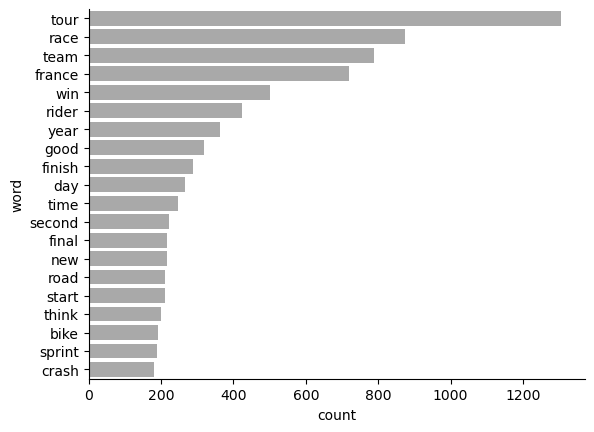

In [287]:
ax = sns.barplot(data=cn_top_words, 
                 y='word',
                 x='count',
                 color='darkgray') 
sns.despine() 
plt.show()

### export

In [288]:
import pickle as pkl

with open("../data/dict_gensim.pkl", "wb") as file:
    pkl.dump(dictionary, file)

with open("../data/corpus.pkl", "wb") as file:
    pkl.dump(corpus_p, file)

with open("../data/document_term_matrix.pkl", "wb") as file:
    pkl.dump(document_term_matrix, file)

### Topic Model

Topic Models sind probabilistische Modelle, die zur Bestimmung von semantischen Clustern in Dokumentensammlungen verwendet werden. Sie eignen sich für die Erforschung von Textdaten, da sie thematische Strukturen finden, die nicht im Voraus definiert sind. Die Berechnung zielt darauf ab, die proportionale Zusammensetzung einer festen Anzahl von Themen in den Dokumenten einer Sammlung zu bestimmen. Diese semantischen Cluster können wir als Themen interpretieren.

Topic Modelle liefern Wahrscheinlichkeitsverteilungen über die Menge aller Wörter für jedes Thema und Wahrscheinlichkeitsverteilungen über die Menge der Themen für jedes Dokument. Jede kleinste Analyseeinheit (z. B. ein Wort oder ein n-Gramm) hat eine Wahrscheinlichkeit, zu jedem Thema zu gehören, und jedes Thema hat eine Wahrscheinlichkeit, in jedem Dokument aufzutreten. Ein Thema wird semantisch interpretierbar durch die n wahrscheinlichsten Wörter, die es enthält.

In [137]:
import gensim
from gensim.models import LdaModel

# train an LDA model on the corpus
lda_model = LdaModel(document_term_matrix,
                     id2word=dictionary, 
                     num_topics=10, 
                     passes = 10)

In [138]:
# print the topics and associated keywords
for topic in lda_model.print_topics():
    print(topic)

(0, '0.028*"stage" + 0.025*"tour" + 0.018*"race" + 0.016*"france" + 0.016*"team" + 0.014*"win" + 0.010*"good" + 0.009*"rider" + 0.008*"day" + 0.008*"finish"')
(1, '0.013*"gino" + 0.010*"new" + 0.008*"bike" + 0.008*"motor" + 0.008*"team" + 0.008*"bosch" + 0.006*"thought" + 0.006*"gino_mder" + 0.006*"brand" + 0.006*"friend"')
(2, '0.017*"bike" + 0.008*"new" + 0.007*"gravel" + 0.006*"model" + 0.006*"merida" + 0.006*"scultura" + 0.006*"contador" + 0.005*"light" + 0.004*"crash" + 0.004*"endurance_gr"')
(3, '0.035*"tour" + 0.019*"race" + 0.016*"france" + 0.016*"year" + 0.013*"team" + 0.009*"win" + 0.009*"stage" + 0.007*"good" + 0.006*"season" + 0.006*"sprint"')
(4, '0.017*"race" + 0.007*"tour" + 0.007*"new" + 0.006*"zwift" + 0.006*"cycling" + 0.006*"rider" + 0.006*"team" + 0.005*"win" + 0.005*"year" + 0.004*"look"')
(5, '0.013*"drive" + 0.012*"system" + 0.011*"rim" + 0.008*"helmet" + 0.007*"bike" + 0.007*"claim" + 0.006*"wheel" + 0.006*"new" + 0.006*"use" + 0.006*"ceramicspeed"')
(6, '0.025*

Auswahl des Modells anhand des Kohärenz Scores. 


Die Topic Kohärenz bewerten ein einzelnes Topic, indem sie den Grad der semantischen Ähnlichkeit zwischen hoch bewerteten Wörtern im Thema messen. Diese Messungen helfen bei der Unterscheidung zwischen Themen, die semantisch interpretierbar sind, und Themen, die Artefakte statistischer Inferenz sind.  Zusätzlich können wir verschiedene Modelle mit dem Wert der mittleren Kohärenz vergleichen.

In [162]:
from gensim.models import CoherenceModel

scores = []
models = []

for num_topics in np.arange(5, 20):

    # fit LDA model
    lda_model = LdaModel(document_term_matrix,
                         id2word=dictionary,
                         num_topics=num_topics,
                         random_state=12345
                        )

    # compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model,
                                         texts=corpus_p,
                                         dictionary=dictionary)
    
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score with {0} topics: {1}'.format(num_topics, coherence_lda))

    scores.append([num_topics, coherence_lda])
    models.append(lda_model)


Coherence Score with 5 topics: 0.37563758131220404

Coherence Score with 6 topics: 0.35947254943931806

Coherence Score with 7 topics: 0.36960203680861786

Coherence Score with 8 topics: 0.36761232776708275

Coherence Score with 9 topics: 0.3573606463479079

Coherence Score with 10 topics: 0.36250560548640637

Coherence Score with 11 topics: 0.3552217446110391

Coherence Score with 12 topics: 0.3684964969672995

Coherence Score with 13 topics: 0.376092112109147

Coherence Score with 14 topics: 0.364892561779667

Coherence Score with 15 topics: 0.3622821812122244

Coherence Score with 16 topics: 0.3679667093112856

Coherence Score with 17 topics: 0.35885123283852416

Coherence Score with 18 topics: 0.3567958540110786

Coherence Score with 19 topics: 0.35807622091380636


In [163]:
scores_df = pd.DataFrame(scores, columns=['num_topic', 'coherence_score'])

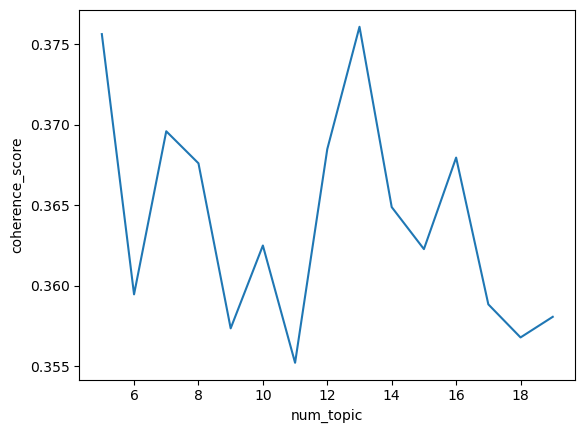

In [164]:
ax = sns.lineplot(data=scores_df, x='num_topic', y='coherence_score')
plt.show()

In [177]:
scores_df[scores_df.coherence_score == max(scores_df.coherence_score)]

,num_topic,coherence_score
8,13,0.376092


In [179]:
# best model
lda_model_best = models[8]

In [180]:
import pyLDAvis
import pyLDAvis.gensim_models

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_best,
                                     document_term_matrix,
                                     dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.042224 -0.007406       1        1  23.871952
5      0.060300  0.010444       2        1  21.944760
10     0.025444  0.015243       3        1  17.704433
2      0.029313  0.004642       4        1   7.808622
0      0.019406 -0.020646       5        1   6.240438
12     0.005331 -0.030010       6        1   5.492484
3     -0.019953  0.003689       7        1   3.478868
7      0.005199  0.003947       8        1   3.164728
8     -0.078767  0.011826       9        1   3.019619
4     -0.000368  0.034601      10        1   2.812246
1     -0.002179 -0.002121      11        1   1.912091
9     -0.065437 -0.004804      12        1   1.525976
11    -0.020513 -0.019403      13        1   1.023782, topic_info=             Term         Freq        Total Category  logprob  loglift
122          tour  1255.000000  1255.000000  Default  30.0000  30.0000
112         stage   878.000000   878.000000  Default  29.0000  29.0000
89           race   844.000000   844.000000  Default  28.0000  28.0000
117          team   727.000000   727.000000  Default  27.0000  27.0000
225        france   702.000000   702.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
417         final     1.397431   205.367831  Topic13  -5.9195  -0.4085
110        sprint     1.295785   186.675383  Topic13  -5.9950  -0.3886
433          like     1.223084   145.911552  Topic13  -6.0527  -0.2000
49   giro_ditalia     1.216797   154.701196  Topic13  -6.0579  -0.2636
26            day     1.292692   257.890385  Topic13  -5.9974  -0.7141

[1040 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
5522      4  0.152035   abus
5522      5  0.152035   abus
5522      6  0.152035   abus
5522      7  0.152035   abus
5522      8  0.152035   abus
...     ...       ...    ...
4380      8  0.046562  zwift
4380      9  0.046562  zwift
4380     10  0.093123  zwift
4380     11  0.046562  zwift
4380     12  0.046562  zwift

[2585 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 11, 3, 1, 13, 4, 8, 9, 5, 2, 10, 12])